In [42]:
import warnings
warnings.filterwarnings("ignore")


Importing dataset

In [43]:
import pandas as pd
mallDf = pd.read_csv('../input/Mall_Customers.csv')

In [44]:
mallDf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
mallDf.shape

(200, 5)

In [46]:
mallDf.all

<bound method DataFrame.all of      CustomerID          ...           Spending Score (1-100)
0             1          ...                               39
1             2          ...                               81
2             3          ...                                6
3             4          ...                               77
4             5          ...                               40
5             6          ...                               76
6             7          ...                                6
7             8          ...                               94
8             9          ...                                3
9            10          ...                               72
10           11          ...                               14
11           12          ...                               99
12           13          ...                               15
13           14          ...                               77
14           15          ...           

In [47]:
mallDf.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [48]:
mallDf.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [49]:
mallDf['Gender']

0        Male
1        Male
2      Female
3      Female
4      Female
5      Female
6      Female
7      Female
8        Male
9      Female
10       Male
11     Female
12     Female
13     Female
14       Male
15       Male
16     Female
17       Male
18       Male
19     Female
20       Male
21       Male
22     Female
23       Male
24     Female
25       Male
26     Female
27       Male
28     Female
29     Female
        ...  
170      Male
171      Male
172      Male
173      Male
174    Female
175    Female
176      Male
177      Male
178      Male
179      Male
180    Female
181    Female
182      Male
183    Female
184    Female
185      Male
186    Female
187      Male
188    Female
189    Female
190    Female
191    Female
192      Male
193    Female
194    Female
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [50]:
mallDf.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
mallDfCopy = mallDf.copy()

Converting Gender into 1/0 format

In [52]:
mallDfCopy.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
mallDfCopy['GenderCode'] = mallDfCopy.apply(lambda x: 1 if x['Gender'] == 'Male' else  0, axis = 1)

In [54]:
mallDfCopy.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),GenderCode
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [55]:
mallDfCopy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0
GenderCode,200.0,0.44,0.497633,0.0,0.00,0.0,1.00,1.0


Visualizing data

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

In [57]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Text(0.5, 0, 'Annual Income')

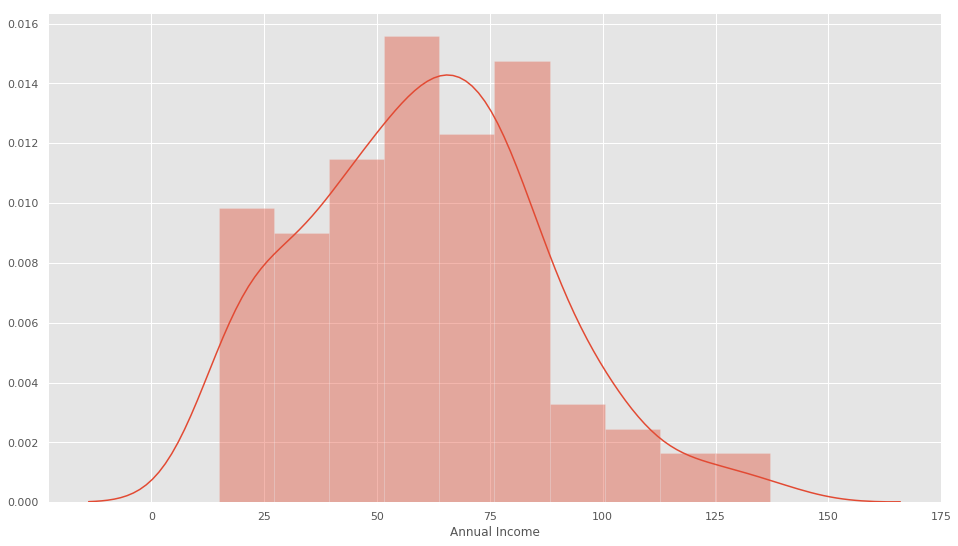

In [58]:
#Visualizing the data - displot
plot_income = sns.distplot(mallDfCopy["Annual Income (k$)"])
plt.xlabel('Annual Income')

Text(0.5, 0, 'Spending Score')

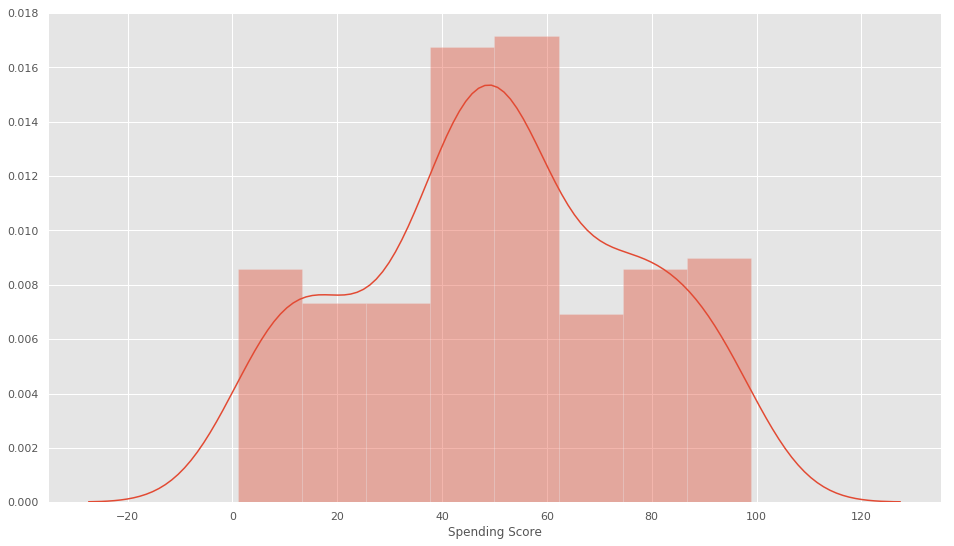

In [59]:
plot_spending_score = sns.distplot(mallDfCopy["Spending Score (1-100)"])
plt.xlabel('Spending Score')

Text(0.5, 0, 'Age')

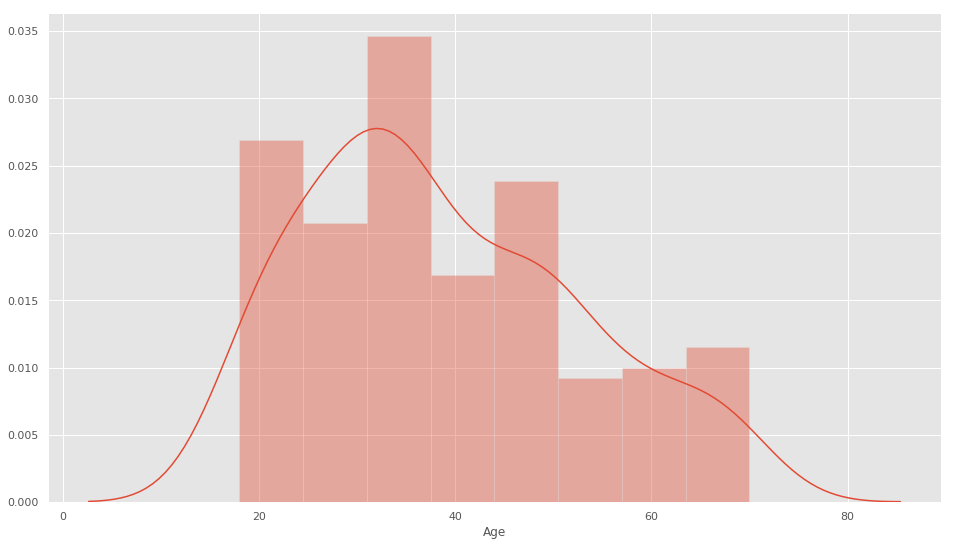

In [60]:
plot_age = sns.distplot(mallDfCopy["Age"])
plt.xlabel('Age')

[(0, 200)]

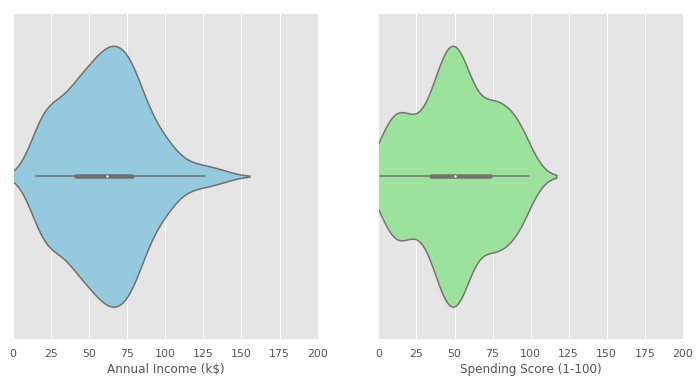

In [61]:
#Visualizing the data - Violin plot
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True,sharey=True)
v1 = sns.violinplot(data=mallDfCopy,x='Annual Income (k$)', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=mallDfCopy,x='Spending Score (1-100)',color="lightgreen",ax=axes[1])
v1.set(xlim=(0,200))

Kmeans method - Using Annual Income & Spending Score

In [62]:
mallDf1 = mallDfCopy[['Annual Income (k$)', 'Spending Score (1-100)']]

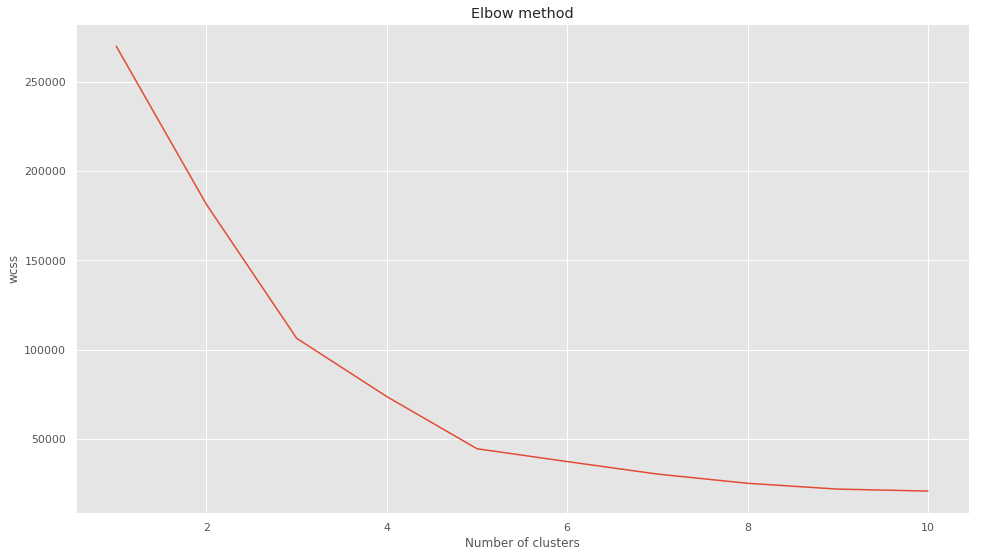

In [63]:
#Using the elbow method to find the optium number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  km = KMeans (n_clusters=i,init='k-means++',max_iter=300, n_init = 10, random_state=0)
  km.fit(mallDf1)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


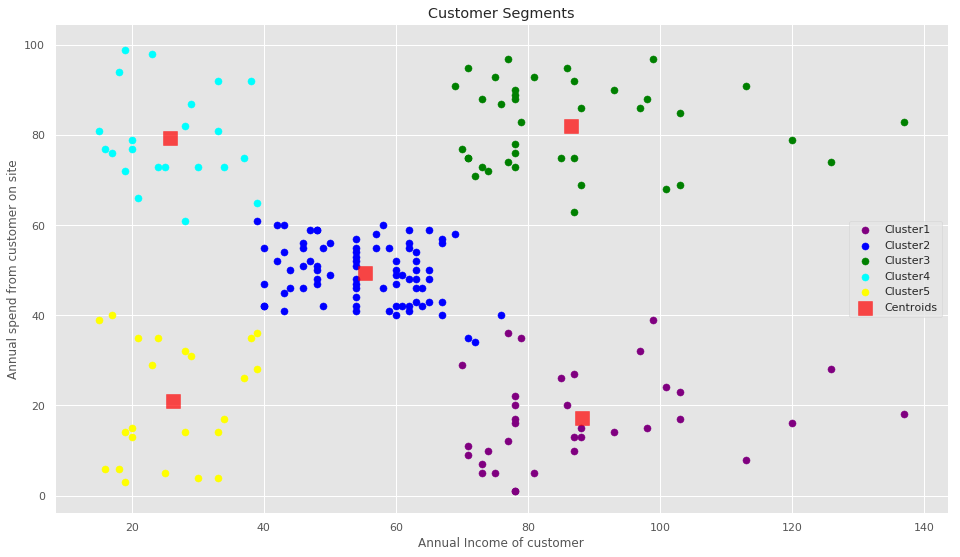

In [64]:
##fitting kmeans to the dataset with k=5
km5 = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means = km5.fit_predict(mallDf1)
#Visualizing clusters for k = 5
plt.scatter(mallDf1[y_means==0]['Annual Income (k$)'],mallDf1[y_means==0]['Spending Score (1-100)'],s=50,c='purple',label='Cluster1')
plt.scatter(mallDf1[y_means==1]['Annual Income (k$)'],mallDf1[y_means==1]['Spending Score (1-100)'],s=50,c='blue',label='Cluster2')
plt.scatter(mallDf1[y_means==2]['Annual Income (k$)'],mallDf1[y_means==2]['Spending Score (1-100)'],s=50,c='green',label='Cluster3')
plt.scatter(mallDf1[y_means==3]['Annual Income (k$)'],mallDf1[y_means==3]['Spending Score (1-100)'],s=50,c='cyan',label='Cluster4')
plt.scatter(mallDf1[y_means==4]['Annual Income (k$)'],mallDf1[y_means==4]['Spending Score (1-100)'],s=50,c='yellow',label='Cluster5')

plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=200,marker='s',c='red',alpha=0.7,label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

In [65]:
mallDf1[y_means==0]['Annual Income (k$)']

124     70
128     71
130     71
134     73
136     73
138     74
140     75
144     77
146     77
148     78
150     78
152     78
154     78
156     78
158     78
160     79
162     81
164     85
166     86
168     87
170     87
172     87
174     88
176     88
178     93
180     97
182     98
184     99
186    101
188    103
190    103
192    113
194    120
196    126
198    137
Name: Annual Income (k$), dtype: int64

KMeans using Age, Annual Income & Spending Score.

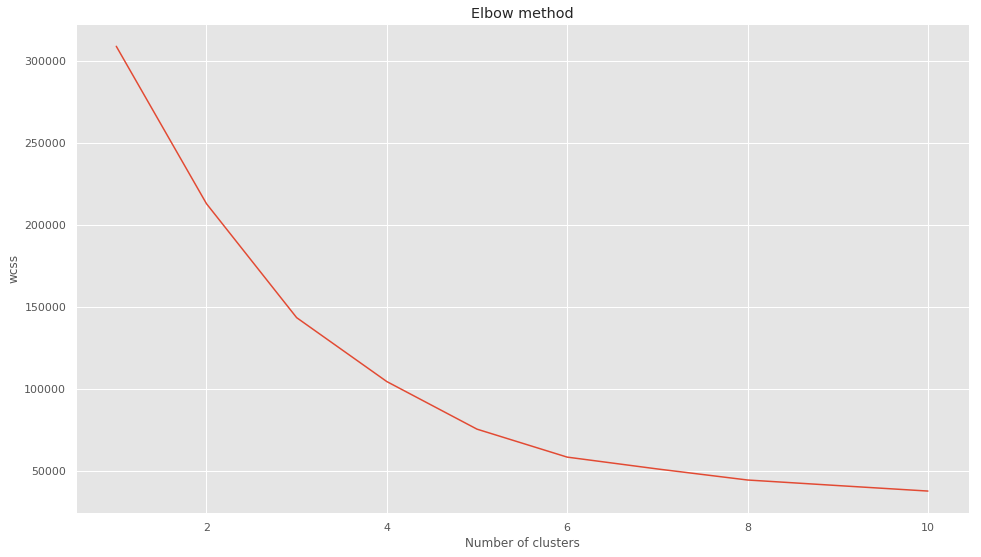

In [66]:
mallDf2 = mallDfCopy[['Age','Annual Income (k$)','Spending Score (1-100)']]
wcss = []
for i in range(1,11):
  km = KMeans (n_clusters=i,init='k-means++',max_iter=300, n_init = 10, random_state=0)
  km.fit(mallDf2)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Number of clusters - 6

In [67]:
##fitting kmeans to the dataset with k=6
km6 = KMeans(n_clusters=6,init='k-means++',max_iter=300,n_init=10,random_state=0)
km6.fit(mallDf2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [68]:
labels = km6.labels_
centroids = km6.cluster_centers_

In [69]:
mallDfCopy['labels'] = labels

In [80]:
import plotly.graph_objs as go
import plotly as py
py.offline.init_notebook_mode(connected = True)

trace1 = go.Scatter3d(
        x = mallDfCopy['Age'],
        y = mallDfCopy['Spending Score (1-100)'],
        z = mallDfCopy['Annual Income (k$)'],
        mode = 'markers',
        marker = dict(
                color = mallDfCopy['labels'],
                size = 20,
                line = dict(
                    color = mallDfCopy['labels'],
                    width = 12
                ),
                opacity = 0.8
        )
)
data = [trace1]
layout = go.Layout(
        title = 'Clusters',
        scene = dict(
                xaxis = dict(title = 'Age'),
                yaxis = dict(title = 'Spending Score'),
                zaxis = dict(title = 'Annual Income')
            )
)
fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)